# Ford GoBike System Data Exploration

## Investigation Overview
In this investigation, I wanted to look at the user type using GoBike and how long they take.

## Dataset Overview
The GoBike dataset contains the information of the individuals rides through San Francisco Bay area during the period from 2017 - 2020. The dataset contains information like the trip duration and start and end time.  It also contains information regarding the types of individuals and the start and end location.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

In [2]:
path = r'C:\Users\wejdan\Downloads\ford_gobike'

#store list of all file locations
all_files = glob.glob(os.path.join(path, "*.csv"))

#load and union the dataset
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

#write newly loaded data
df.to_csv('allford_files.csv', index=False)

#load the dataset
df = pd.read_csv('allford_files.csv')

<ipython-input-2-dbff5fd97a69>:7: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
<ipython-input-2-dbff5fd97a69>:7: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
<ipython-input-2-dbff5fd97a69>:7: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
C:\Users\wejdan\Desktop\MantidInstall\bin\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#changing data type of start_time and end_time to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
#drop unused columns
columns_drop=['start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude', 'rental_access_method']

df.drop(columns=columns_drop, inplace = True)

In [8]:
#extract the hours from start time 
df['start_time_hours']=df['start_time'].dt.hour
#extract the minute from start time 
df['start_time_minutes']=df['start_time'].dt.minute + df['start_time_hours']*60

In [9]:
#extract the hours from end time 
df['end_time_hours']=df['end_time'].dt.hour
#extract the minute from end time 
df['end_time_minutes']=df['end_time'].dt.minute + df['start_time_hours']*60

In [10]:
df['month']=df.start_time.dt.month

## Distribution of Duration Trip
Trip durations in the dataset take on a very large range of values, from about 8000 sec at the lowest, to about 2000 sec at the highest. Plotted on a graph, the distribution of duration takes on a high to low shape.

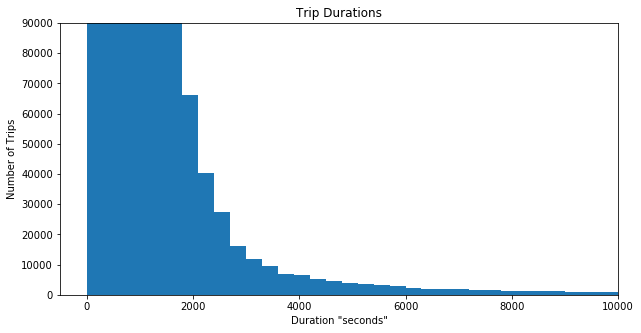

In [12]:
plt.figure(figsize=(10,5))
dur_bins = np.arange(1,df.duration_sec.max()+300,300)
plt.hist(data=df,x='duration_sec',bins=dur_bins)
plt.title('Trip Durations')
plt.xlabel('Duration "seconds"')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

## Distribution of User Type
As shown in the graph subscriber users are higher than customers in using the bikes.

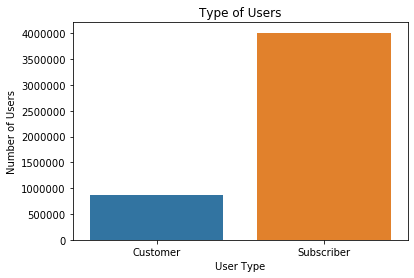

In [13]:
sb.countplot(data=df,x='user_type')
plt.title("Type of Users")
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

## User Type vs. Duration
we saw that the number of subscribers is high and they take a short duration in bike riding but customers take a long duration.

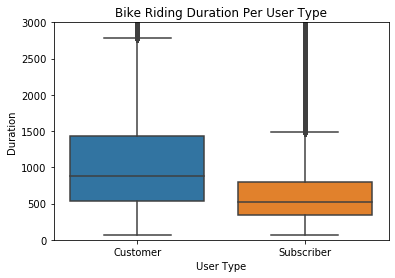

In [16]:
sb.boxplot(data=df, x='user_type', y='duration_sec')
plt.ylim(0,3000)
plt.title("Bike Riding Duration Per User Type")
plt.xlabel('User Type')
plt.ylabel('Duration')
plt.show()

## Duration by Start Time for User Type
The graph shows the subscribers generally ride for a shorter time than customers who ride for a longer time during the period from 8 am. And some of both types prefer to end the trip in 2000 sec.

C:\Users\wejdan\Desktop\MantidInstall\bin\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


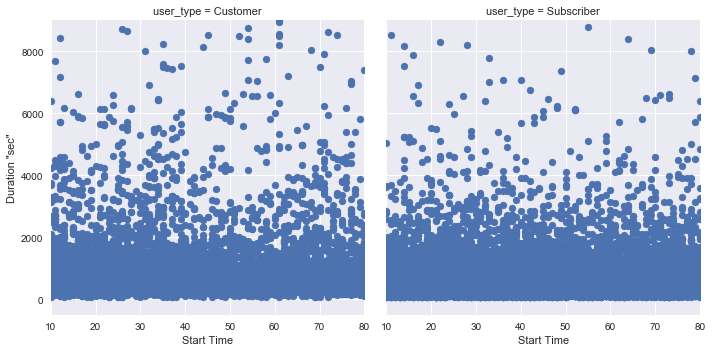

In [20]:
ut=sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
ut.map(plt.scatter, 'start_time_minutes', 'duration_sec')
ut.set_xlabels('Start Time')
ut.set_ylabels('Duration "sec"')
plt.show()